# Importation des données

In [7]:
import pandas as pd

# Remplacez 'path_to_your_file.csv' par le chemin vers votre fichier de données
file_path = 'data_p7.csv'
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
data = pd.read_csv(file_path, encoding='ISO-8859-1', names=column_names, header=None)

# Afficher les premières lignes pour vérifier que les colonnes ont été nommées correctement
print(data.head())

   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


Pour notre cible target 0 = negative, 2 = neutral, 4 = positive.

In [9]:
# Afficher les statistiques descriptives
print(data.describe(include='all'))

# Afficher la distribution des valeurs manquantes
print(data.isnull().sum())

              target            id                          date      flag  \
count   1.600000e+06  1.600000e+06                       1600000   1600000   
unique           NaN           NaN                        774363         1   
top              NaN           NaN  Mon Jun 15 12:53:14 PDT 2009  NO_QUERY   
freq             NaN           NaN                            20   1600000   
mean    2.000000e+00  1.998818e+09                           NaN       NaN   
std     2.000001e+00  1.935761e+08                           NaN       NaN   
min     0.000000e+00  1.467810e+09                           NaN       NaN   
25%     0.000000e+00  1.956916e+09                           NaN       NaN   
50%     2.000000e+00  2.002102e+09                           NaN       NaN   
75%     4.000000e+00  2.177059e+09                           NaN       NaN   
max     4.000000e+00  2.329206e+09                           NaN       NaN   

            user                       text  
count    1600000 

# Exploration des données

### Cible Target

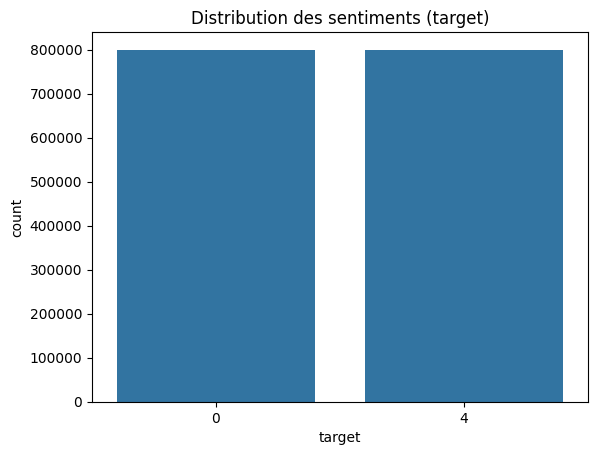

target
0    50.0
4    50.0
Name: proportion, dtype: float64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution des valeurs de 'target'
sns.countplot(x='target', data=data)
plt.title('Distribution des sentiments (target)')
plt.show()

# Calculer le pourcentage de chaque classe
target_distribution = data['target'].value_counts(normalize=True) * 100
print(target_distribution)


Nous avons une distribution parfaite

### Duplica

In [15]:
# Vérifier l'unicité de la colonne 'id'
id_unique = data['id'].is_unique
print(f"Les IDs sont-ils uniques ? {id_unique}")

# Vérifier s'il y a des duplicatas d'ID
duplicate_ids = data['id'].duplicated().sum()
print(f"Nombre de duplicatas d'IDs : {duplicate_ids}")


Les IDs sont-ils uniques ? False
Nombre de duplicatas d'IDs : 1685


Nousallons voir comment ce répartisse les tweets qui ont été dupliqué.

In [17]:
# Identifier les IDs dupliqués
duplicated_ids = data[data['id'].duplicated(keep=False)]

# Grouper par ID pour vérifier si toutes les colonnes des lignes dupliquées sont identiques
duplicated_groups = duplicated_ids.groupby('id')

# Vérifier si les lignes sont toutes identiques pour chaque ID dupliqué
identical_rows = duplicated_groups.apply(lambda group: group.duplicated().all())

# Filtrer les IDs dupliqués qui n'ont pas toutes leurs lignes identiques
different_rows = identical_rows[~identical_rows].index

# Afficher le nombre d'IDs avec des lignes non identiques
print(f"Nombre d'IDs dupliqués avec des lignes non identiques : {len(different_rows)}")

# Afficher quelques exemples d'IDs avec des lignes non identiques
if len(different_rows) > 0:
    print("Exemples d'IDs dupliqués avec des lignes non identiques :")
    for id_ in different_rows[:5]:  # Limiter à 5 exemples pour éviter une trop longue sortie
        print(f"\nID: {id_}")
        print(duplicated_ids[duplicated_ids['id'] == id_])
else:
    print("Toutes les lignes des IDs dupliqués sont identiques.")


Nombre d'IDs dupliqués avec des lignes non identiques : 1685
Exemples d'IDs dupliqués avec des lignes non identiques :

ID: 1467863684
        target          id                          date      flag      user  \
213          0  1467863684  Mon Apr 06 22:33:35 PDT 2009  NO_QUERY  DjGundam   
800261       4  1467863684  Mon Apr 06 22:33:35 PDT 2009  NO_QUERY  DjGundam   

                                                     text  
213     Awwh babs... you look so sad underneith that s...  
800261  Awwh babs... you look so sad underneith that s...  

ID: 1467880442
        target          id                          date      flag     user  \
275          0  1467880442  Mon Apr 06 22:38:04 PDT 2009  NO_QUERY  iCalvin   
800300       4  1467880442  Mon Apr 06 22:38:04 PDT 2009  NO_QUERY  iCalvin   

                                                     text  
275     Haven't tweeted nearly all day  Posted my webs...  
800300  Haven't tweeted nearly all day  Posted my webs...  

ID: 14680

C:\Users\trist\AppData\Local\Temp\ipykernel_21004\3052459327.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  identical_rows = duplicated_groups.apply(lambda group: group.duplicated().all())


In [18]:
# Identifier les IDs dupliqués
duplicated_ids = data[data['id'].duplicated(keep=False)]

# Grouper par ID pour vérifier si toutes les colonnes des lignes dupliquées sont identiques,
# en ignorant la première colonne
duplicated_groups = duplicated_ids.groupby('id')

# Vérifier si les lignes sont toutes identiques pour chaque ID dupliqué, en ignorant la première colonne
identical_rows = duplicated_groups.apply(lambda group: group.iloc[:, 1:].duplicated().all())

# Filtrer les IDs dupliqués qui n'ont pas toutes leurs lignes identiques
different_rows = identical_rows[~identical_rows].index

# Extraire les lignes où les IDs sont dupliqués et les lignes ne sont pas identiques
different_rows_data = duplicated_ids[duplicated_ids['id'].isin(different_rows)]

# Calculer la proportion de la variable 'target' pour ces lignes
target_proportions = different_rows_data['target'].value_counts(normalize=True) * 100

# Afficher la proportion pour la variable 'target'
print("Proportion de la variable 'target' pour les IDs dupliqués ayant des lignes différentes :")
print(target_proportions)


Proportion de la variable 'target' pour les IDs dupliqués ayant des lignes différentes :
target
0    50.0
4    50.0
Name: proportion, dtype: float64


C:\Users\trist\AppData\Local\Temp\ipykernel_21004\3120925433.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  identical_rows = duplicated_groups.apply(lambda group: group.iloc[:, 1:].duplicated().all())


Comme nous pouvons voir précédement les tweets dupliqué ont un 0 et un 4 en target a chaque fois nous ne pouvons donc pas les fusionnés. 
Comme il n'y en a que 1685 sur environ 800000 données nous pouvons nous permettre de les supprimé. 
Deplus comme il y a 50% de ces données en 0 et 50% en 4 cela ne changera pas le ratio de target.

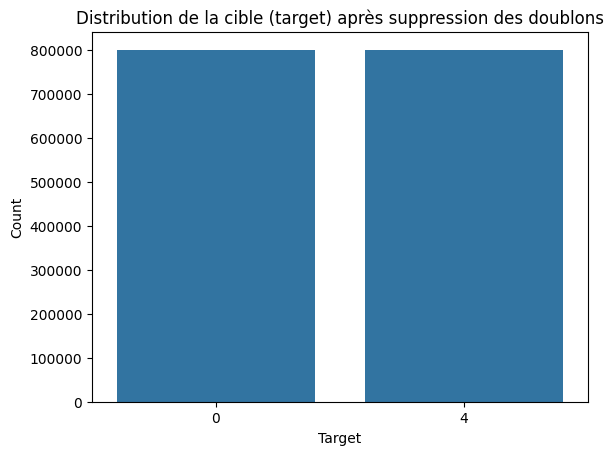

Proportions de la variable 'target' après suppression des doublons :
target
0    50.052712
4    49.947288
Name: proportion, dtype: float64


In [20]:
# Supprimer les doublons en gardant uniquement la première occurrence
data_without_duplicates = data.drop_duplicates(subset=data.columns[1:], keep='first')

# Remplacer le DataFrame original par celui sans doublons
data = data_without_duplicates


import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation de la distribution de la cible 'target'
sns.countplot(x='target', data=data)
plt.title('Distribution de la cible (target) après suppression des doublons')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Affichage des proportions de la cible 'target' en pourcentage
target_proportions = data['target'].value_counts(normalize=True) * 100
print("Proportions de la variable 'target' après suppression des doublons :")
print(target_proportions)


## Distribution des tweets

C:\Users\trist\AppData\Local\Temp\ipykernel_21004\3200521143.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


Nombre de dates invalides : 0


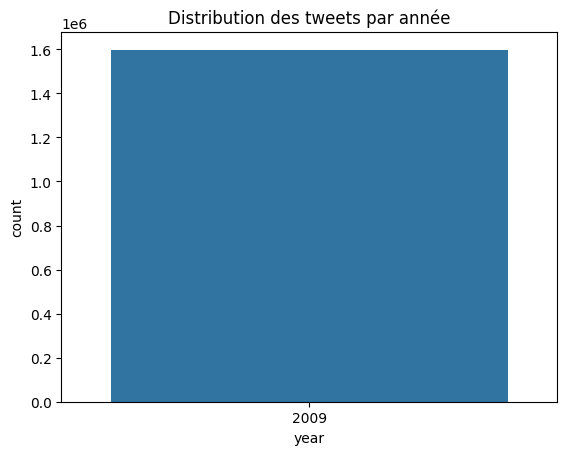

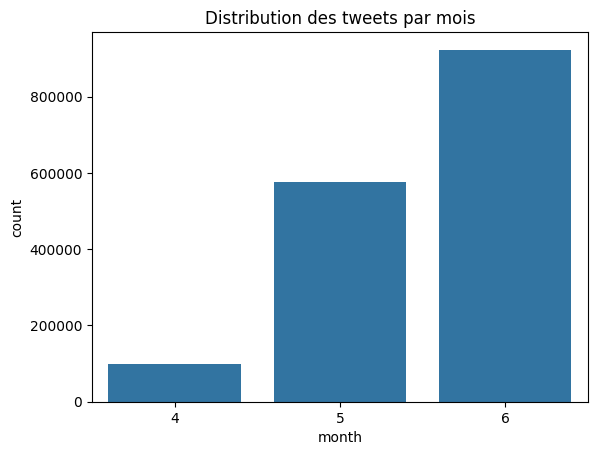

In [22]:
# Convertir la colonne 'date' en datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Vérifier les valeurs non converties (NaT)
invalid_dates = data['date'].isna().sum()
print(f"Nombre de dates invalides : {invalid_dates}")

# Distribution des tweets par date
data['year'] = data['date'].dt.year
sns.countplot(x='year', data=data)
plt.title('Distribution des tweets par année')
plt.show()

# Distribution mensuelle (optionnel)
data['month'] = data['date'].dt.month
sns.countplot(x='month', data=data)
plt.title('Distribution des tweets par mois')
plt.show()


### Moyenne du nombre de mots en fonction de la cible target 

In [24]:
# Calculer le nombre de mots par tweet
data['word_count'] = data['text'].apply(lambda x: len(x.split()))

# Afficher les premières lignes pour vérifier
print(data[['text', 'word_count']].head())


                                                text  word_count
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          19
1  is upset that he can't update his Facebook by ...          21
2  @Kenichan I dived many times for the ball. Man...          18
3    my whole body feels itchy and like its on fire           10
4  @nationwideclass no, it's not behaving at all....          21


In [25]:
# Calculer la moyenne du nombre de mots par tweet pour l'ensemble des données
average_word_count = data['word_count'].mean()
print(f"Moyenne du nombre de mots par tweet : {average_word_count:.2f}")


Moyenne du nombre de mots par tweet : 13.17


In [26]:
# Calculer la moyenne du nombre de mots par tweet pour les tweets avec target = 0
average_word_count_target_0 = data[data['target'] == 0]['word_count'].mean()
print(f"Moyenne du nombre de mots par tweet avec target = 0 : {average_word_count_target_0:.2f}")


Moyenne du nombre de mots par tweet avec target = 0 : 13.58


In [27]:
# Calculer la moyenne du nombre de mots par tweet pour les tweets avec target = 4
average_word_count_target_4 = data[data['target'] == 4]['word_count'].mean()
print(f"Moyenne du nombre de mots par tweet avec target = 4 : {average_word_count_target_4:.2f}")


Moyenne du nombre de mots par tweet avec target = 4 : 12.76


Objectif : Comprendre quand les tweets sont généralement publiés.  
Utilité : Cela peut révéler des tendances temporelles qui influencent le sentiment.


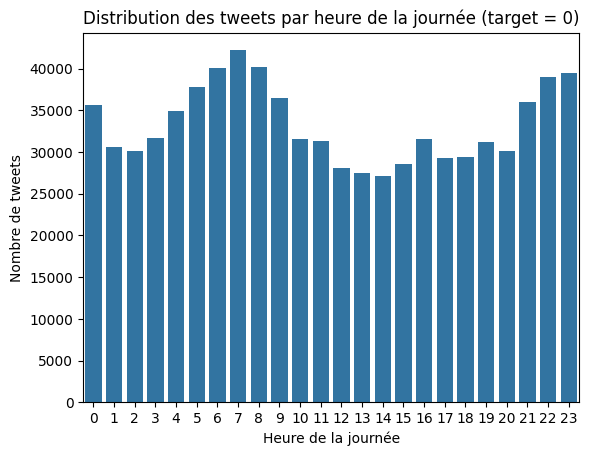

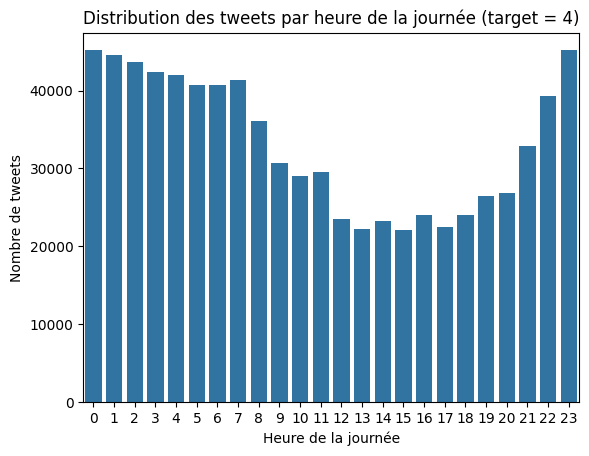

In [40]:
# Extraire l'heure de publication
data['hour'] = data['date'].dt.hour

# Distribution des tweets par heure pour target = 0
sns.countplot(x='hour', data=data[data['target'] == 0])
plt.title('Distribution des tweets par heure de la journée (target = 0)')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de tweets')
plt.show()

# Distribution des tweets par heure pour target = 4
sns.countplot(x='hour', data=data[data['target'] == 4])
plt.title('Distribution des tweets par heure de la journée (target = 4)')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de tweets')
plt.show()


### Analyse des mots les plus fréquents (au-delà du word cloud) :

Objectif : Identifier les mots les plus courants pour chaque classe de target.  
Utilité : Comprendre le vocabulaire dominant associé aux sentiments positifs et négatifs.

In [48]:
from collections import Counter

# Fonction pour extraire les mots les plus fréquents
def get_most_common_words(data, target_value, num_words=20):
    words = ' '.join(data[data['target'] == target_value]['text']).split()
    common_words = Counter(words).most_common(num_words)
    return common_words

# Mots les plus fréquents pour target = 0
common_words_target_0 = get_most_common_words(data, 0)
print(f"Mots les plus fréquents pour target=0 : {common_words_target_0}")

# Mots les plus fréquents pour target = 4
common_words_target_4 = get_most_common_words(data, 4)
print(f"Mots les plus fréquents pour target=4 : {common_words_target_4}")


Mots les plus fréquents pour target=0 : [('to', 306518), ('I', 299822), ('the', 241000), ('a', 175824), ('my', 166917), ('i', 160132), ('and', 140240), ('is', 118126), ('in', 108421), ('for', 96298), ('it', 91087), ('of', 90914), ('have', 77876), ('on', 77565), ('you', 75488), ('so', 72738), ('me', 69347), ('but', 68267), ('that', 61908), ('not', 61387)]
Mots les plus fréquents pour target=4 : [('the', 245896), ('to', 245721), ('I', 196129), ('a', 189980), ('you', 138067), ('and', 134691), ('for', 113219), ('my', 112754), ('is', 99300), ('in', 93587), ('i', 89406), ('of', 88424), ('it', 80462), ('on', 76594), ('with', 62498), ('that', 56642), ('have', 54118), ('me', 53012), ('so', 52220), ('be', 51273)]


                                                text  sentiment
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   0.216667
1  is upset that he can't update his Facebook by ...   0.000000
2  @Kenichan I dived many times for the ball. Man...   0.500000
3    my whole body feels itchy and like its on fire    0.200000
4  @nationwideclass no, it's not behaving at all....  -0.625000


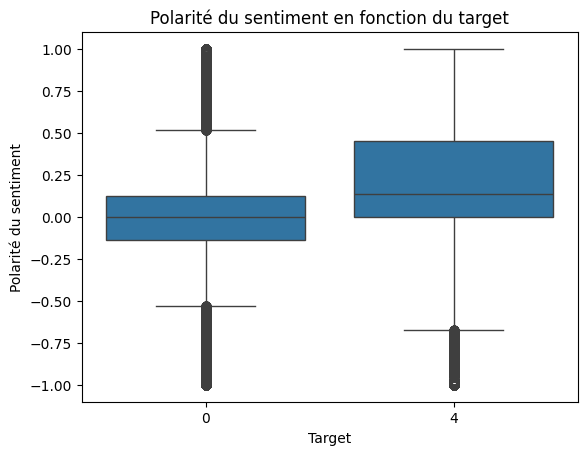

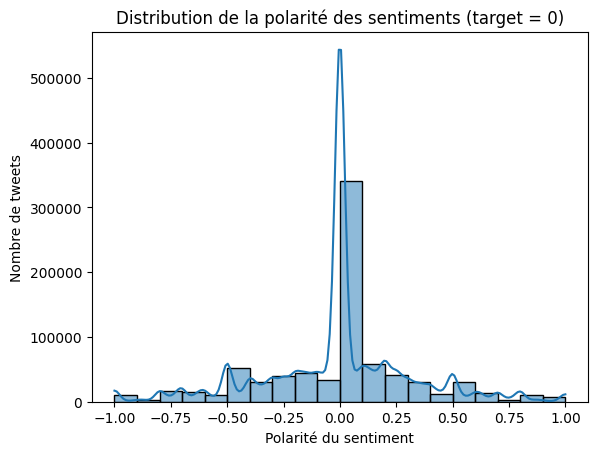

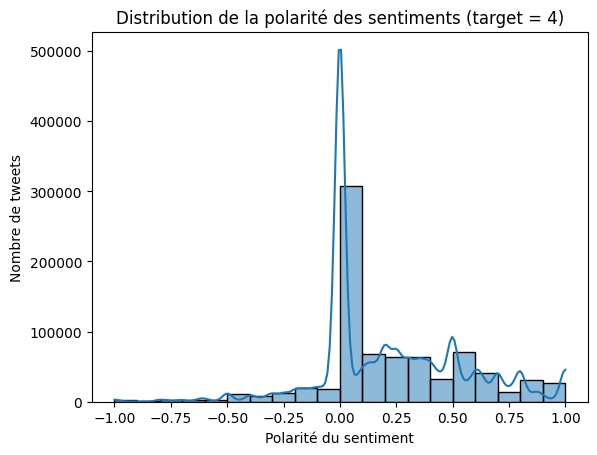

In [49]:
!pip install textblob
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Appliquer TextBlob pour obtenir une polarité de sentiment pour chaque tweet
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Afficher les premières lignes pour vérifier les résultats
print(data[['text', 'sentiment']].head())

# Comparer la polarité de sentiment avec le target
sns.boxplot(x='target', y='sentiment', data=data)
plt.title('Polarité du sentiment en fonction du target')
plt.xlabel('Target')
plt.ylabel('Polarité du sentiment')
plt.show()

# Distribution des sentiments pour target = 0
sns.histplot(data[data['target'] == 0]['sentiment'], bins=20, kde=True)
plt.title('Distribution de la polarité des sentiments (target = 0)')
plt.xlabel('Polarité du sentiment')
plt.ylabel('Nombre de tweets')
plt.show()

# Distribution des sentiments pour target = 4
sns.histplot(data[data['target'] == 4]['sentiment'], bins=20, kde=True)
plt.title('Distribution de la polarité des sentiments (target = 4)')
plt.xlabel('Polarité du sentiment')
plt.ylabel('Nombre de tweets')
plt.show()


# Prétraitement des données 

## Conversion en minuscules et suppression des caractères spéciaux :

In [53]:
import re

def preprocess_text(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les caractères spéciaux
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

# Appliquer le prétraitement de base
data['text_cleaned'] = data['text'].apply(preprocess_text)


## Application de la lemmatisation :

In [55]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return lemmatized_text

# Appliquer la lemmatisation
data['text_lemmatized'] = data['text_cleaned'].apply(lemmatize_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\trist\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Application du stemming :

In [57]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    words = nltk.word_tokenize(text)
    stemmed_text = ' '.join([stemmer.stem(word) for word in words])
    return stemmed_text

# Appliquer le stemming
data['text_stemmed'] = data['text_cleaned'].apply(stem_text)

In [67]:
# Exporter le DataFrame modifié vers un fichier CSV
data.to_csv('D:\Master_Openclassroom\Github\projet7-op\data\database_p7_rework.csv', index=False)
